In [1]:
%matplotlib inline
from fig_utils import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import MDS

import sys
sys.path.append('..')
from scluster import SpectralClustering, KSpectralClustering
from kkmeans import KKernelClustering, k_polynomial, k_tanh, k_gaussian
from graph import *

## Spectral Clustering with KNN Graph Construction

In [3]:
knn = 3
W, D, L = construct_graph(noisy_moons[0], param=knn)

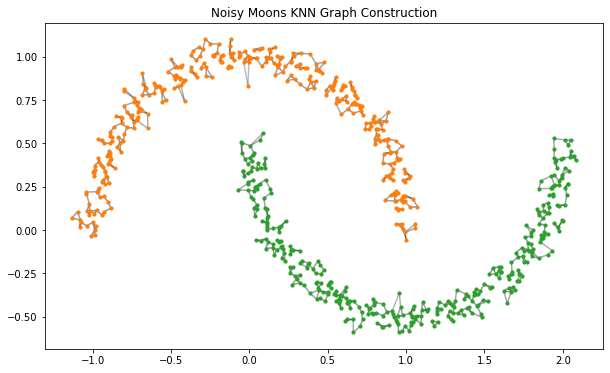

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
view_graph(ax, noisy_moons[0], W)
ax.scatter(*noisy_moons[0][noisy_moons[1]==0,:].T, zorder=200, s=10)
ax.scatter(*noisy_moons[0][noisy_moons[1]==1,:].T, zorder=200, s=10)
ax.set_title("Noisy Moons KNN Graph Construction")
plt.savefig("img/noisy_moons_graph.pdf", format='pdf')

In [55]:
L = 0.5*L + 0.5*L.T
eD, eV = np.linalg.eig(L)
eidx = np.argsort(-eD)
Y = np.real(eV[:, eidx[:knn]].T)

In [57]:
#embed = MDS(n_components=3)
#Y_m = embed.fit_transform(Y.T)
mask = np.zeros(knn, dtype=np.bool)
mask[:3] = 1
np.random.shuffle(mask)
Y_m = Y[mask, :].T

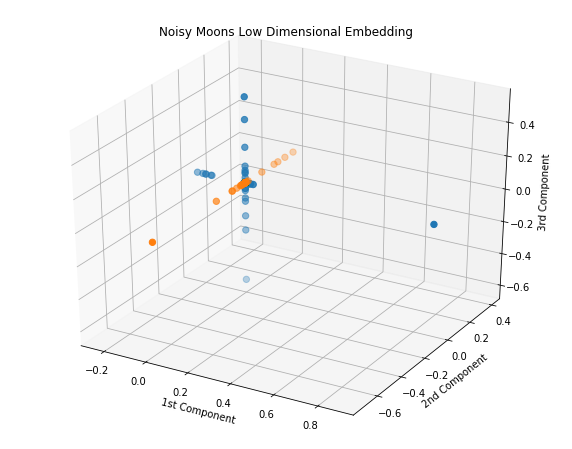

In [58]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*Y_m[noisy_moons[1] == 0, :].T, s=40)
ax.scatter(*Y_m[noisy_moons[1] == 1, :].T, s=40)
ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.set_zlabel("3rd Component")
ax.set_title("Noisy Moons Low Dimensional Embedding")
plt.savefig("img/noisy_moons_embed.pdf", format='pdf')

## Spectral Clustering with Kernels

In [59]:
from graph import view_graph

In [ ]:
print("Classifying Linear Kernel...")
sc = KSpectralClustering(2, 1000, lambda x,y: np.dot(x,y))
sc_moon_labels_linear = sc.train(noisy_moons[0])

In [45]:
print("Classifying Gaussian Kernel...")
sc = KSpectralClustering(2, 1000, lambda x,y: k_gaussian(x,y, .1))
sc_moon_labels_gaussian = sc.train(noisy_moons[0])

Classifying Gaussian Kernel...


In [43]:
print("Classifying Sigmoid Kernel...")
sc = KSpectralClustering(2, 1000, lambda x,y: k_polynomial(x,y, 4))
sc_moon_labels_tanh = sc.train(noisy_moons[0])

Classifying Sigmoid Kernel...


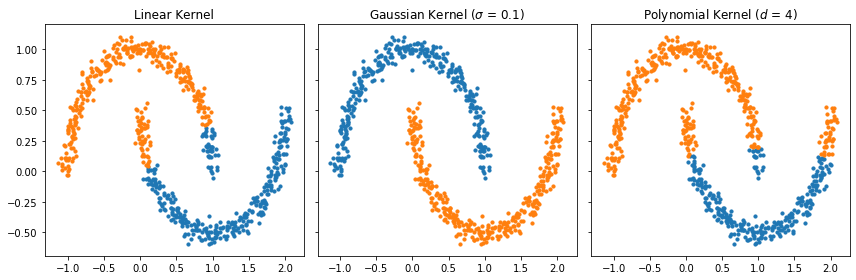

In [51]:
fig, ax = plt.subplots(figsize=(12, 4), ncols=3, sharey=True)
#view_graph(ax, noisy_moons[0], sc._W )
ax_plot_clusters(ax[0], noisy_moons[0], sc_moon_labels_linear, s=10)
ax_plot_clusters(ax[1], noisy_moons[0], sc_moon_labels_gaussian, s=10)
ax_plot_clusters(ax[2], noisy_moons[0], sc_moon_labels_tanh, s=10)
ax[0].set_title("Linear Kernel")
ax[1].set_title("Gaussian Kernel ($\sigma$ = 0.1)")
ax[2].set_title("Polynomial Kernel ($d$ = 4)")
plt.tight_layout()
plt.savefig("img/kernel_spectral_clustering.pdf", format="pdf")